Epoch 1/20


c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2134   
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0116 
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051 
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050 
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 
Epoch 16/20
3

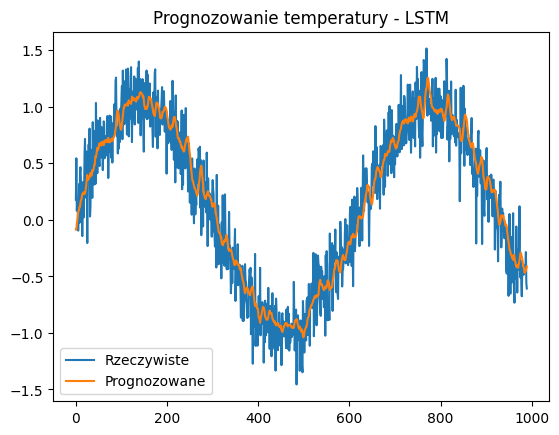

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def generate_temperature_data(n_samples=1000):
    x = np.linspace(0, 10, n_samples)
    y = np.sin(x) + np.random.normal(0, 0.2, size=n_samples)
    return y.reshape(-1, 1)

data = generate_temperature_data()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

def create_sequences(dataset, look_back=10):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, 0])
        Y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(Y)

X, y = create_sequences(data_scaled, look_back=10)
X = X.reshape(X.shape[0], X.shape[1], 1)

model_temp = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X.shape[1], 1)),
    tf.keras.layers.Dense(1)
])

model_temp.compile(optimizer='adam', loss='mse')
model_temp.fit(X, y, epochs=20, batch_size=32)

predicted = model_temp.predict(X)
predicted = scaler.inverse_transform(predicted)

plt.plot(scaler.inverse_transform(y.reshape(-1, 1)), label="Rzeczywiste")
plt.plot(predicted, label="Prognozowane")
plt.legend()
plt.title("Prognozowanie temperatury - LSTM")
plt.show()


In [2]:
def generate_sensor_data(n_samples=1000, timesteps=10):
    X = np.random.normal(0, 1, (n_samples, timesteps))
    y = np.zeros(n_samples)
    
    anomaly_indices = np.random.choice(n_samples, size=n_samples // 10, replace=False)
    X[anomaly_indices] += np.random.normal(5, 1, (len(anomaly_indices), timesteps))
    y[anomaly_indices] = 1
    return X.reshape((n_samples, timesteps, 1)), y

X_anomaly, y_anomaly = generate_sensor_data()
X_train, X_test, y_train, y_test = train_test_split(X_anomaly, y_anomaly, test_size=0.2)

model_anomaly = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(X_anomaly.shape[1], 1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_anomaly.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_anomaly.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model_anomaly.evaluate(X_test, y_test)
print(f"Dokładność wykrywania anomalii: {accuracy:.2f}")


Epoch 1/10


c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7408 - loss: 0.6484 - val_accuracy: 0.9300 - val_loss: 0.5517
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9776 - loss: 0.4794 - val_accuracy: 1.0000 - val_loss: 0.1590
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0801 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0030
Epo

In [3]:
def generate_activity_data(n_samples=1500, timesteps=20):
    X, y = [], []
    for label in range(3):
        for _ in range(n_samples // 3):
            if label == 0:
                sequence = np.random.normal(0, 0.2, (timesteps,))
            elif label == 1:
                sequence = np.sin(np.linspace(0, 3*np.pi, timesteps)) + np.random.normal(0, 0.1, (timesteps,))
            else:
                sequence = np.sin(np.linspace(0, 6*np.pi, timesteps)) + np.random.normal(0, 0.2, (timesteps,))
            X.append(sequence)
            y.append(label)
    return np.array(X).reshape(-1, timesteps, 1), np.array(y)

X_activity, y_activity = generate_activity_data()
y_activity = tf.keras.utils.to_categorical(y_activity, num_classes=3)
X_train, X_test, y_train, y_test = train_test_split(X_activity, y_activity, test_size=0.2)

model_activity = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_activity.shape[1], 1)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_activity.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_activity.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model_activity.evaluate(X_test, y_test)
print(f"Dokładność klasyfikacji aktywności użytkownika: {accuracy:.2f}")

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6797 - loss: 1.0246 - val_accuracy: 0.7333 - val_loss: 0.7105
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8298 - loss: 0.5060 - val_accuracy: 0.9733 - val_loss: 0.1383
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9568 - loss: 0.1333 - val_accuracy: 0.9867 - val_loss: 0.0390
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9862 - loss: 0.0522 - val_accuracy: 0.9933 - val_loss: 0.0287
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9927 - loss: 0.0331 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.0034 - val_accuracy: 0.9933 - val_loss: